In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# tampilkan file di MyDrive root
!ls -la /content/drive/MyDrive

# Jika filenya ada di folder tertentu (misal '3_Supervised Machine .../modul 6'), lihat foldernya:
!ls -la "/content/drive/MyDrive/3_Supervised Machine ..."  # ganti nama folder sesuai
# atau cari nama file secara rekursif (bisa butuh waktu sedikit)
!find /content/drive/MyDrive -maxdepth 4 -name "AmesHousing.csv"

total 36672
drwx------  3 root root     4096 May 13 14:07 'BACA BUKU'
drwx------  3 root root     4096 Aug  2  2023 'Beasiswa '
drwx------ 10 root root     4096 Aug 12  2024 'CAREER LAELA'
drwx------  3 root root     4096 Sep 30  2023 'Colab Notebooks'
-rw-------  1 root root      183 May 30 03:23 'Copy of Introduction to Coding Workshop by Slidesgo.gslides'
-rw-------  1 root root    24641 Feb 12  2025 'Copy of SIMPANAN CV UP TO DATE.docx'
-rw-------  1 root root    65061 Jan 24  2025 'Copy of SURAT DISPEN PELANTIKAN HIPMI PT UDINUS.docx'
-rw-------  1 root root      183 Nov  7  2023 'CV_Laela Sugi Nurfatekhah_112202307048@mhs.dinus.ac.id.gdoc'
-rw-------  1 root root      183 Jun  8  2024 'CV_LAELA SUGI NURFATEKHAH_Group Project Novo Club.gdoc'
-rw-------  1 root root   115090 Jun 28  2024 'CV_LAELA SUGI NURFATEKHAH_Group Project Novo Club.pdf'
-rw-------  1 root root      377 Nov 22  2024 'Diagram Tanpa Judul.drawio'
-rw-------  1 root root      183 Aug 15  2024 'Dokumen tanpa judul

In [18]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ganti path di bawah sesuai hasil 'find' tadi
path = '/content/drive/MyDrive/Kuliah/SEM 5/COURSERA/3_Supervised Machine Learning: Classification/modul 6/AmesHousing.csv'
df = pd.read_csv(path)
print("shape:", df.shape)
df.head()

shape: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [19]:
# Info & ringkasan
df.info()
display(df.describe().T)

# Missing values (urut dari banyak ke sedikit)
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0].head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Qual,159
Garage Yr Blt,159
Garage Cond,159


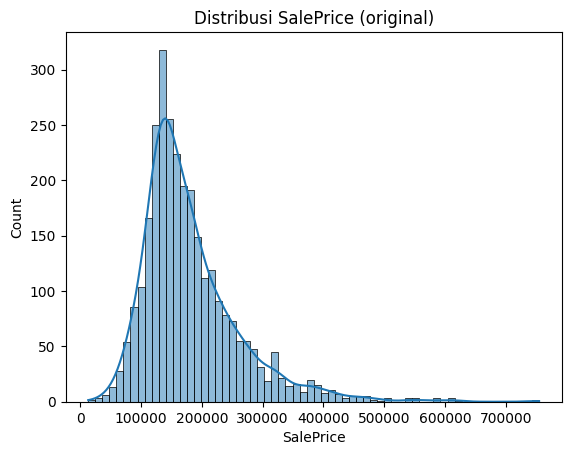

Skewness sebelum: 1.7435000757376466
Skewness setelah log1p: -0.014772659537224382


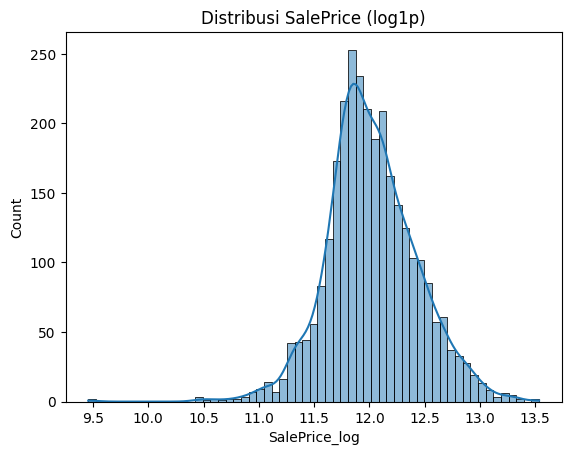

In [20]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribusi SalePrice (original)')
plt.show()

# cek skewness dan transformasi log
print("Skewness sebelum:", df['SalePrice'].skew())
df['SalePrice_log'] = np.log1p(df['SalePrice'])
print("Skewness setelah log1p:", df['SalePrice_log'].skew())
sns.histplot(df['SalePrice_log'], kde=True)
plt.title('Distribusi SalePrice (log1p)')
plt.show()

In [21]:
# copy dataset
data = df.copy()
y = np.log1p(data['SalePrice'])   # gunakan log target
data.drop(['SalePrice','SalePrice_log'], axis=1, inplace=True, errors='ignore')

# pisahkan kolom numerik dan kategorikal
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"Numerical: {len(num_cols)}, Categorical: {len(cat_cols)}")

Numerical: 38, Categorical: 43


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(2344, 81) (586, 81)


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# identifikasi top categorical untuk one-hot (threshold <=10 unique)
top_cat = [c for c in cat_cols if X_train[c].nunique() <= 10]
other_cat = [c for c in cat_cols if X_train[c].nunique() > 10]

# frequency encode for high-cardinality cols (map from train)
for c in other_cat:
    freq = X_train[c].value_counts(normalize=True)
    X_train[c + '_freq'] = X_train[c].map(freq).fillna(0)
    X_test[c + '_freq'] = X_test[c].map(freq).fillna(0)

# final numeric columns: original numeric + freq encoded columns
final_num_cols = num_cols + [c + '_freq' for c in other_cat]

# pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, final_num_cols),
    ('cat', cat_pipeline, top_cat)
], remainder='drop')

In [24]:
!pip install -q xgboost

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 1) Linear Regression pipeline
pipe_lr = Pipeline([('pre', preprocessor), ('model', LinearRegression())])
pipe_lr.fit(X_train, y_train)
pred_lr = pipe_lr.predict(X_test)
rmse_lr = rmse(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)

# 2) Random Forest pipeline
pipe_rf = Pipeline([('pre', preprocessor), ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])
pipe_rf.fit(X_train, y_train)
pred_rf = pipe_rf.predict(X_test)
rmse_rf = rmse(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

# 3) XGBoost pipeline
pipe_xgb = Pipeline([('pre', preprocessor), ('model', xgb.XGBRegressor(n_estimators=200, random_state=42, n_jobs=-1, verbosity=0))])
pipe_xgb.fit(X_train, y_train)
pred_xgb = pipe_xgb.predict(X_test)
rmse_xgb = rmse(y_test, pred_xgb)
r2_xgb = r2_score(y_test, pred_xgb)

# Tampilkan hasil
import pandas as pd
results = pd.DataFrame({
    'model': ['LinearRegression','RandomForest','XGBoost'],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'R2': [r2_lr, r2_rf, r2_xgb]
}).sort_values('RMSE')
results

,model,RMSE,R2
2,XGBoost,0.116768,0.926311
1,RandomForest,0.122322,0.919134
0,LinearRegression,0.143392,0.888876


In [26]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_rmse(pipeline):
    scores = -cross_val_score(pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1)
    return scores.mean(), scores.std()

cv_lr = cv_rmse(pipe_lr)
cv_rf = cv_rmse(pipe_rf)
cv_xgb = cv_rmse(pipe_xgb)

pd.DataFrame({
    'model': ['LinearRegression','RandomForest','XGBoost'],
    'CV_RMSE_mean': [cv_lr[0], cv_rf[0], cv_xgb[0]],
    'CV_RMSE_std': [cv_lr[1], cv_rf[1], cv_xgb[1]]
}).sort_values('CV_RMSE_mean')

,model,CV_RMSE_mean,CV_RMSE_std
2,XGBoost,0.141694,0.026201
1,RandomForest,0.144507,0.022496
0,LinearRegression,0.151383,0.052268


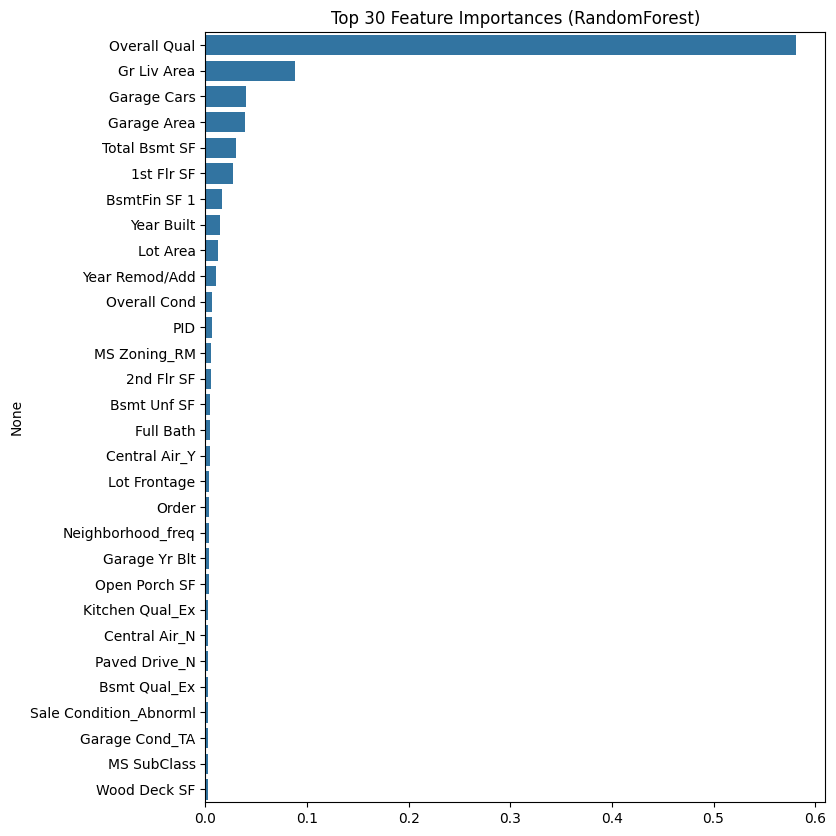

In [27]:
# Fit ulang rf jika perlu (sudah fit sebelumnya)
# Ekstrak nama fitur setelah preprocessing
pipe_rf.named_steps['pre']  # untuk akses

# ambil feature names untuk numeric
num_features = final_num_cols

# onehot feature names
ohe = pipe_rf.named_steps['pre'].named_transformers_['cat'].named_steps['onehot']
ohe_features = list(ohe.get_feature_names_out(top_cat))
feature_names = num_features + ohe_features

# importances
importances = pipe_rf.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(30)

plt.figure(figsize=(8,10))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Top 30 Feature Importances (RandomForest)')
plt.show()

In [28]:
out = X_test.copy()
out['y_true_log'] = y_test
out['y_pred_log'] = pred_rf   # ganti sesuai model yang dipilih, misal pred_xgb
out['y_true'] = np.expm1(out['y_true_log'])
out['y_pred'] = np.expm1(out['y_pred_log'])

out.to_csv('/content/drive/MyDrive/ames_predictions.csv', index=False)
print("Saved predictions to /content/drive/MyDrive/ames_predictions.csv")

Saved predictions to /content/drive/MyDrive/ames_predictions.csv


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5]
}

pipe_rf_tune = Pipeline([('pre', preprocessor), ('model', RandomForestRegressor(random_state=42, n_jobs=-1))])
gs = GridSearchCV(pipe_rf_tune, param_grid, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
print("Best CV RMSE:", -gs.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best CV RMSE: 0.1439675084050162
